In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x) + 0.1*np.random.randn(len(x))

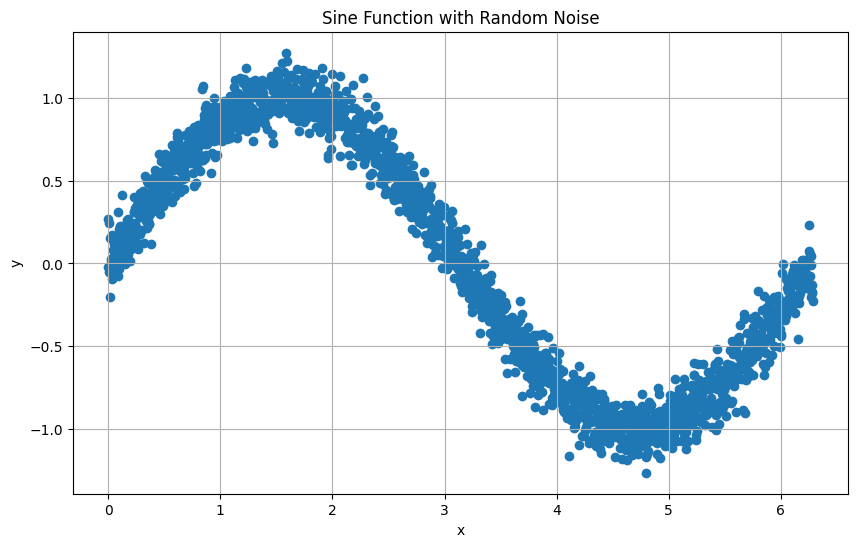

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title("Sine Function with Random Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [54]:
x_tensor = torch.from_numpy(x).float().view(-1, 1)
y_tensor = torch.from_numpy(y).float().view(-1, 1)

In [55]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # One hidden layer of size 16
        self.hidden1 = nn.Linear(1, 16)

        #self.hidden2 = nn.Linear(16, 16)

        # Output layer
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        # Apply sigmoid on the hidden layer
        x = F.sigmoid(self.hidden1(x))  # First hidden layer + sigmoid
        #x = F.sigmoid(self.hidden2(x))  # Second hidden layer + sigmaoid
        # Output layer (no activation for regression problems usually)
        x = self.output(x)
        return x


In [56]:
model = Net()

In [57]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

Epoch [100/7000], Loss: 0.3460
Epoch [200/7000], Loss: 0.2507
Epoch [300/7000], Loss: 0.2025
Epoch [400/7000], Loss: 0.1856
Epoch [500/7000], Loss: 0.1776
Epoch [600/7000], Loss: 0.1698
Epoch [700/7000], Loss: 0.1605
Epoch [800/7000], Loss: 0.1495
Epoch [900/7000], Loss: 0.1373
Epoch [1000/7000], Loss: 0.1248
Epoch [1100/7000], Loss: 0.1126
Epoch [1200/7000], Loss: 0.1013
Epoch [1300/7000], Loss: 0.0916
Epoch [1400/7000], Loss: 0.0838
Epoch [1500/7000], Loss: 0.0776
Epoch [1600/7000], Loss: 0.0727
Epoch [1700/7000], Loss: 0.0689
Epoch [1800/7000], Loss: 0.0658
Epoch [1900/7000], Loss: 0.0632
Epoch [2000/7000], Loss: 0.0609
Epoch [2100/7000], Loss: 0.0589
Epoch [2200/7000], Loss: 0.0570
Epoch [2300/7000], Loss: 0.0551
Epoch [2400/7000], Loss: 0.0534
Epoch [2500/7000], Loss: 0.0516
Epoch [2600/7000], Loss: 0.0498
Epoch [2700/7000], Loss: 0.0480
Epoch [2800/7000], Loss: 0.0462
Epoch [2900/7000], Loss: 0.0443
Epoch [3000/7000], Loss: 0.0424
Epoch [3100/7000], Loss: 0.0404
Epoch [3200/7000]

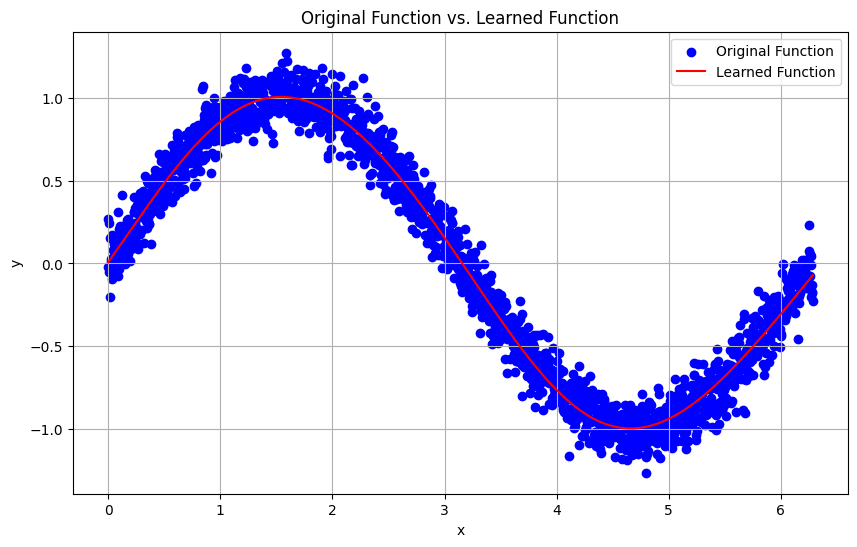

In [58]:
num_epochs = 7000
for epoch in range(num_epochs):
  #forward pass
  outputs = model(x_tensor)
  loss = criterion(outputs, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the trained model
with torch.no_grad():
    predicted = model(x_tensor)

# Plot the original function and the learned function
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Function')
plt.plot(x, predicted.numpy(), color='red', label='Learned Function')
plt.title("Original Function vs. Learned Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
!pip install onnx
import onnx

# We'll pick one sample (or a small batch) to give the right shape.
example_input = x_tensor[0:1]

# Export to ONNX
torch.onnx.export(
    model,                     # your trained model
    example_input,             # model input (or a tuple for multiple inputs)
    "sin_model.onnx",           # output file name
    export_params=True,        # store the trained parameter weights
    opset_version=11,          # ONNX opset version
    do_constant_folding=True,  # fold constants for optimization
    input_names=["input"],     # (optional) input tensor names
    output_names=["output"],   # (optional) output tensor names
    dynamic_axes={"input": {0: "batch_size"},  # (optional) dynamic axis
                  "output": {0: "batch_size"}}
)
